[nltk_data] Downloading package punkt to /home/emil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/emil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 1.00


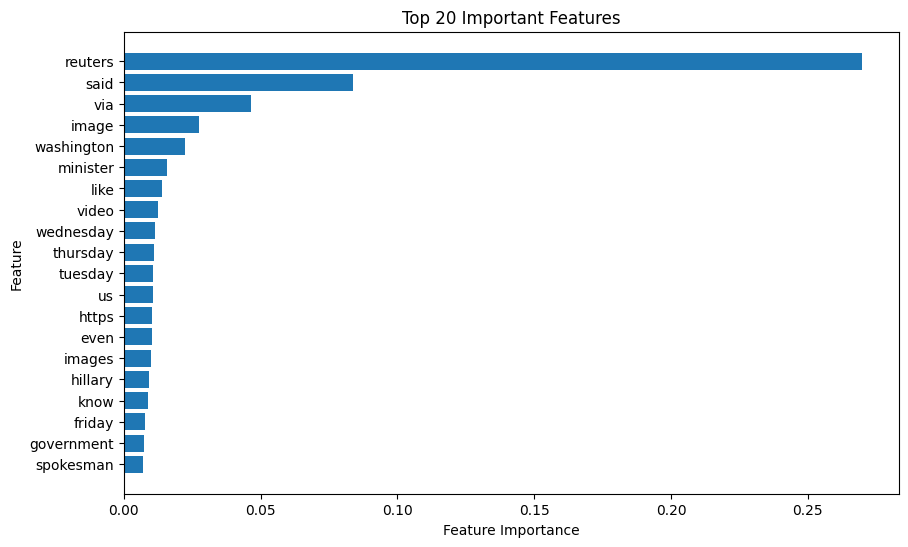

In [3]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load your data
df_fake = pd.read_csv("input/Fake.csv")
df_true = pd.read_csv("input//True.csv")
df_fake["label"] = 0
df_true["label"] = 1
df = pd.concat([df_fake, df_true], axis =0)

# Clean the text by removing stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(clean_text)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features for simplicity
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get feature importances
feature_importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False).head(20)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()
plt.show()


[nltk_data] Downloading package punkt to /home/emil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/emil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.98


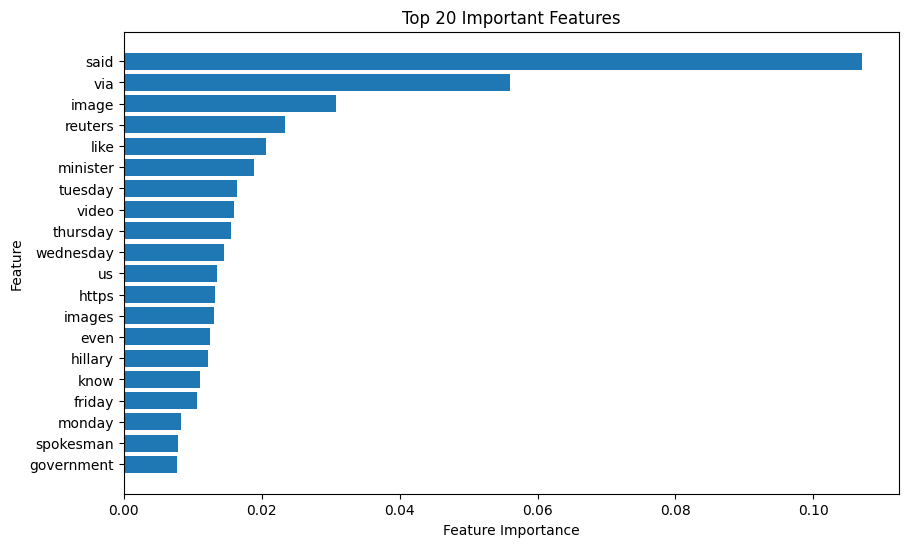

In [4]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load your data
df_fake = pd.read_csv("input/Fake.csv")
df_true = pd.read_csv("input//True.csv")
df_fake["label"] = 0
df_true["label"] = 1
df = pd.concat([df_fake, df_true], axis =0)

# Clean the text by removing stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove the specified pattern
    pattern = r'^[\s\S]*?\(Reuters\) - '
    text = re.sub(pattern, '', text)
    # Tokenize and remove stopwords and non-alphanumeric words
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(clean_text)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features for simplicity
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get feature importances
feature_importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False).head(20)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()
plt.show()